### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import pandas_datareader as pdr

In [ ]:
import pandas as pd
df = pd.read_csv('NIFTY-50_Data.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,29 Mar 2023,16977.30,17126.15,16940.60,17080.70
1,28 Mar 2023,17031.75,17061.75,16913.75,16951.70
2,27 Mar 2023,16984.30,17091.00,16918.55,16985.70
3,24 Mar 2023,17076.20,17109.45,16917.35,16945.05
4,23 Mar 2023,17097.40,17205.40,17045.30,17076.90


In [ ]:
df.tail()

,Date,Open,High,Low,Close
4460,07 Apr 2005,2069.15,2084.90,2048.05,2052.8
4461,06 Apr 2005,2054.00,2073.10,2051.30,2069.3
4462,05 Apr 2005,2063.20,2077.95,2043.70,2052.5
4463,04 Apr 2005,2067.65,2076.60,2054.90,2063.4
4464,01 Apr 2005,2035.90,2071.20,2024.25,2067.6


In [ ]:
# Asceding order
df = df.iloc[::-1]
df1=df.reset_index()['Close']

In [ ]:
df1

0        2067.60
1        2063.40
2        2052.50
3        2069.30
4        2052.80
          ...   
4460    17076.90
4461    16945.05
4462    16985.70
4463    16951.70
4464    17080.70
Name: Close, Length: 4465, dtype: float64

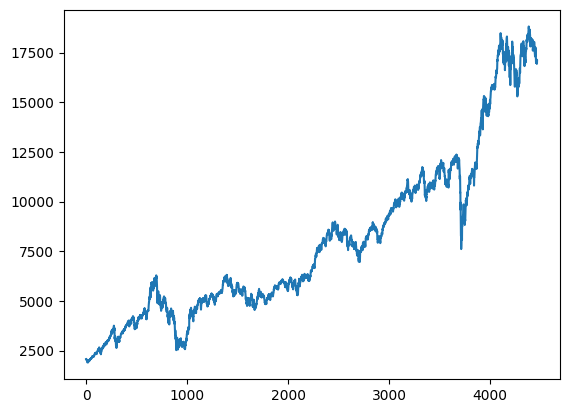

In [ ]:
# Plotting data
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
df1

0        2067.60
1        2063.40
2        2052.50
3        2069.30
4        2052.80
          ...   
4460    17076.90
4461    16945.05
4462    16985.70
4463    16951.70
4464    17080.70
Name: Close, Length: 4465, dtype: float64

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00976345]
 [0.00951508]
 [0.00887049]
 ...
 [0.89196925]
 [0.8899586 ]
 [0.89758723]]


In [ ]:
# Training & Testing dataset
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2902, 1563)

In [ ]:
train_data

array([[0.00976345],
       [0.00951508],
       [0.00887049],
       ...,
       [0.36661739],
       [0.37518037],
       [0.3760615 ]])

In [ ]:
test_data

array([[0.37068598],
       [0.37370195],
       [0.37137197],
       ...,
       [0.89196925],
       [0.8899586 ],
       [0.89758723]])

In [ ]:
# Dataset matrix 
# dataX = [dataset[i]...dataset[i+timestep-1]] & dataY = [dataset[i+timestep]]
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2891, 10)
(2891,)


In [ ]:
print(X_test.shape)
print(ytest.shape)

(1552, 10)
(1552,)


In [ ]:
# LSTM(sample,time_step,feature)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Stacked LSTM model
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1), activation="tanh"))
model.add(LSTM(50,return_sequences=True,activation="tanh"))
model.add(LSTM(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64)

Epoch 1/300
46/46 [==============================] - 8s 58ms/step - loss: 0.0305 - val_loss: 0.2316
Epoch 2/300
46/46 [==============================] - 2s 42ms/step - loss: 0.0107 - val_loss: 0.1524
Epoch 3/300
46/46 [==============================] - 1s 29ms/step - loss: 0.0020 - val_loss: 0.0647
Epoch 4/300
46/46 [==============================] - 1s 28ms/step - loss: 3.7089e-04 - val_loss: 0.0648
Epoch 5/300
46/46 [==============================] - 1s 27ms/step - loss: 3.0557e-04 - val_loss: 0.0598
Epoch 6/300
46/46 [==============================] - 1s 28ms/step - loss: 2.6562e-04 - val_loss: 0.0574
Epoch 7/300
46/46 [==============================] - 1s 28ms/step - loss: 2.4700e-04 - val_loss: 0.0522
Epoch 8/300
46/46 [==============================] - 1s 28ms/step - loss: 2.1450e-04 - val_loss: 0.0445
Epoch 9/300
46/46 [==============================] - 1s 28ms/step - loss: 1.9695e-04 - val_loss: 0.0393
Epoch 10/300
46/46 [==============================] - 1s 29ms/step - loss: 1

In [ ]:
model.evaluate(X_train, y_train)

91/91 [==============================] - 1s 6ms/step - loss: 2.0352e-05


2.0352341380203143e-05

In [ ]:
# Predicting 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
print(train_predict)
print(test_predict)
print(y_train)
print(train_predict)

from prettytable import PrettyTable
train_table = PrettyTable()
train_table.field_names = ["Last Known : X_train", "Actual : y_train", "Predicted : train_predict", "Action"]
for i in range(len(y_train)):
  if(X_train[i][-1] < train_predict[i]):
    train_table.add_row([X_train[i][-1],y_train[i],train_predict[i],"long"])
  else:
    train_table.add_row([X_train[i][-1],y_train[i],train_predict[i],"short"])
print(train_table[-5:])

test_table = PrettyTable()
test_table.field_names = ["Last Known : X_test","Actual : ytest", "Predicted : test_predict", "Action"]
for i in range(len(ytest)):
  if(X_test[i][-1] < test_predict[i]):
    test_table.add_row([X_test[i][-1],ytest[i],test_predict[i],"long"])
  else:
    test_table.add_row([X_test[i][-1],ytest[i],test_predict[i],"short"])
print(test_table[-5:])

49/49 [==============================] - 0s 6ms/step
[[0.0096226 ]
 [0.00919107]
 [0.00872692]
 ...
 [0.37098297]
 [0.37122127]
 [0.36859584]]
[[0.36253804]
 [0.35705516]
 [0.36630562]
 ...
 [0.7408196 ]
 [0.7373042 ]
 [0.7397932 ]]
[0.00149616 0.00040804 0.00160852 ... 0.3690479  0.36661739 0.37518037]
[[0.0096226 ]
 [0.00919107]
 [0.00872692]
 ...
 [0.37098297]
 [0.37122127]
 [0.36859584]]
+----------------------+---------------------+---------------------------+--------+
| Last Known : X_train |   Actual : y_train  | Predicted : train_predict | Action |
+----------------------+---------------------+---------------------------+--------+
|     [0.3719929]      | 0.36571850975753994 |        [0.37340367]       |  long  |
|     [0.36571851]     | 0.36819633353045533 |        [0.3670217]        |  long  |
|     [0.36819633]     | 0.36904790065050264 |        [0.37098297]       |  long  |
|     [0.3690479]      |  0.3666173861620343 |        [0.37122127]       |  long  |
|     [0.36661739

In [ ]:
# Data inverse transform
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# MAE MSE RMSE 
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Test Data RMSE
mae = mean_absolute_error(ytest, test_predict)
mse = mean_squared_error(ytest, test_predict)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 11851.199236053633
MSE: 144326332.6992825
RMSE: 12013.589501031009


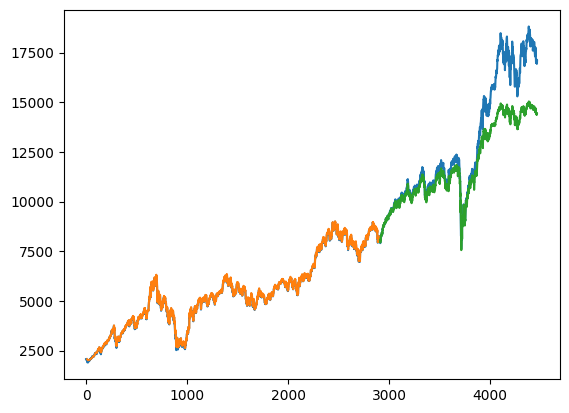

In [ ]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)
print(test_data)

[[0.37068598]
 [0.37370195]
 [0.37137197]
 ...
 [0.89196925]
 [0.8899586 ]
 [0.89758723]]


In [ ]:
x_input = test_data[1463:].reshape(1,-1)
print(x_input.shape)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
print(temp_input)

(1, 100)
[0.9639444115907746, 0.9612359550561799, 0.9536191602602012, 0.9726315789473684, 0.9714163217031343, 0.9758072146658784, 0.9761768184506211, 0.9722885866351273, 0.9701448846836193, 0.9614104080425784, 0.9663926670609108, 0.967755765819042, 0.9805795387344766, 0.9822738024837375, 0.9852306327616794, 0.9885008870490833, 0.9967977528089887, 1.0, 0.993116499112951, 0.9934092253104673, 0.9899615612063869, 0.9850975753991721, 0.9879863985807215, 0.9813187463039622, 0.9813512714370197, 0.9879065641632171, 0.9909994086339443, 0.9764872856298049, 0.96785925487877, 0.9768154937906565, 0.9747368421052632, 0.963725606150207, 0.95948255470136, 0.9405263157894738, 0.9528149024246008, 0.9597752808988763, 0.9591957421643998, 0.9632465996451803, 0.9581785925487877, 0.9636280307510349, 0.9657037256061501, 0.954491425192194, 0.951487285629805, 0.9436398580721467, 0.9579361324659966, 0.9468746303962153, 0.9457835600236547, 0.9435659373151982, 0.9493849793021879, 0.9457332939089297, 0.955103489059

In [ ]:
# Prediction for next 2 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<2):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

0 day input [0.95361916 0.97263158 0.97141632 0.97580721 0.97617682 0.97228859
 0.97014488 0.96141041 0.96639267 0.96775577 0.98057954 0.9822738
 0.98523063 0.98850089 0.99679775 1.         0.9931165  0.99340923
 0.98996156 0.98509758 0.9879864  0.98131875 0.98135127 0.98790656
 0.99099941 0.97648729 0.96785925 0.97681549 0.97473684 0.96372561
 0.95948255 0.94052632 0.9528149  0.95977528 0.95919574 0.9632466
 0.95817859 0.96362803 0.96570373 0.95449143 0.95148729 0.94363986
 0.95793613 0.94687463 0.94578356 0.94356594 0.94938498 0.94573329
 0.95510349 0.96172975 0.95832939 0.95358664 0.95896215 0.95894737
 0.9455618  0.92855411 0.9311916  0.93197221 0.92926079 0.92891189
 0.94332052 0.93803075 0.93548196 0.94436428 0.9456505  0.94346541
 0.93840331 0.94780308 0.95288882 0.95407156 0.94865169 0.94276168
 0.94170313 0.92559432 0.92304849 0.92036073 0.91603785 0.91078947
 0.9194796  0.91185098 0.92796274 0.93488764 0.93742756 0.92768185
 0.91723241 0.90193968 0.89537552 0.89116795 0.89196

In [ ]:
import matplotlib.pyplot as plt
df1 =  scaler.inverse_transform(df1)

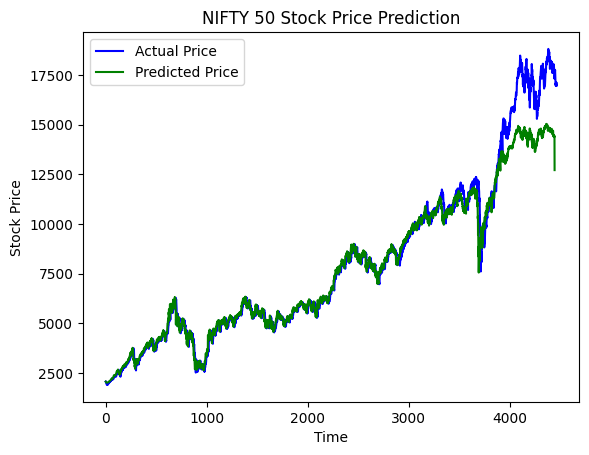

In [ ]:
df2 = np.concatenate((train_predict,test_predict,scaler.inverse_transform(lst_output)))
plt.plot(df1, color = 'blue', label = 'Actual Price')
plt.plot(df2, color = 'green', label = 'Predicted Price')
plt.title('NIFTY 50 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()